Author: Pierce Rotman

Instructor: Pashaie

Course: CAP 6673

Date: 26 October 2023

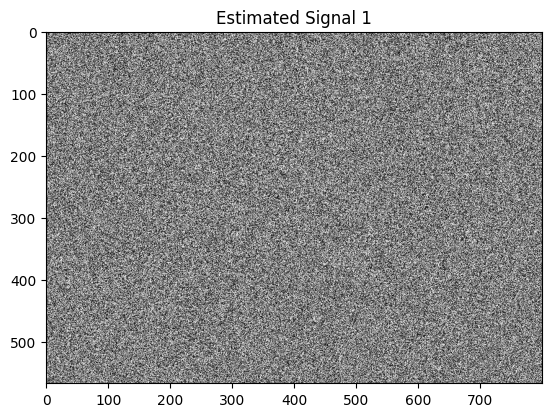

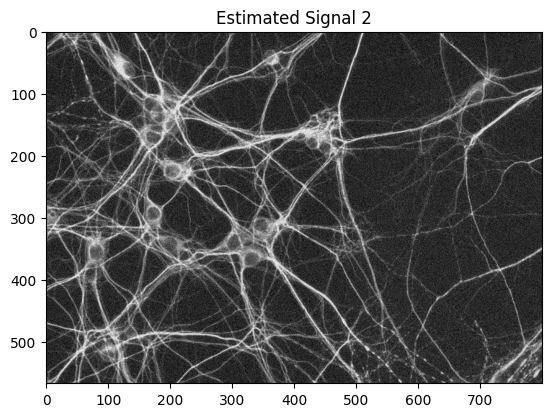

In [3]:
"""
Author: Pierce Rotman
Professor: Pashaie
Course: CAP 6673
Date: 26 October 2023
Performs a fast ICA algorithm to separate the noise from an image.
"""

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt



def g2(x):
    """
    Calculates value of g2 function
    Args:
        x (numpy.ndarray): input value
    Returns:
        (numpy.ndarray): value of output function
    """
    return -x * np.exp(-(x**2)/2)

def g2prime(x):
    """
    Calculates value of g2 function derivative
    Args:
        x (numpy.ndarray): input value
    Returns:
        (numpy.ndarray): value of output function
    """
    return (x**2)* np.exp(-(x**2)/2) - np.exp(-(x**2)/2)

#Read data
r1 = np.array(Image.open("/Users/piercerotman/Documents/MastersProgram"+
                         "/Machine_Learning/Recording-1.png"))
r2 = np.array(Image.open("/Users/piercerotman/Documents/MastersProgram"+
                         "/Machine_Learning/Recording-2.png"))


r1 = r1.flatten().reshape(453600, 1)
r2 = r2.flatten().reshape(453600, 1)

#Centering
r1 = r1- np.mean(r1)
r2 = r2-np.mean(r2)

X = np.concatenate((r1, r2), axis = 1)


#Whitening
covariance = np.cov(X, rowvar=False)
D, E = np.linalg.eig(covariance)
D = np.diag(1/np.sqrt(D))
Xt = E.dot(D).dot(E.transpose())
X = X.dot(Xt).transpose()


#Initialize and normalize W
W = np.random.rand(2,2)
W = W / np.linalg.norm(W)

#Problem
for j in range(2):
    w = W[j,:]
    for i in range(50):
        wtx = np.dot(w.transpose(), X)
        W_new = np.mean(X*g2(wtx), axis = 1) - \
        np.mean(g2prime(wtx), axis=-1)*w
        w = W_new / np.linalg.norm(W_new)

        #decorrelation
        if j == 1:
            w -= np.dot(w.transpose(), W[0,:]) * W[0,:]
    W[j] = w




#Get separated signals
S1 = W[0].dot(X)
S2 = W[1].dot(X)

#reshape for image display
r1_e = S1.reshape(567,800)
r2_e = S2.reshape(567,800)

#Display images

plt.imshow(r1_e, cmap='gray')
plt.title("Estimated Signal 1")
plt.show()

plt.imshow(r2_e, cmap='gray')
plt.title("Estimated Signal 2")

plt.show()